In [2]:
import tensorflow as tf
import autokeras as ak

from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [3]:
# 定義TensorBoard日誌檔路徑
import os, datetime

# log file path
# datatime:讀取當前時間, strftime:格式化成特定字串
logdir = os.path.join('./logs/', datetime.datetime.now().strftime("%Y_%m_%d_%H_%M_%S"))

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=3),
        tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1) # freq=1,每訓練週期以直方圖統計一次
]

# Training
clf = ak.ImageClassifier(max_trials=1, overwrite=True)
clf.fit(x_train, y_train, callbacks=callbacks)

Trial 1 Complete [00h 02m 43s]
val_loss: 0.037420518696308136

Best val_loss So Far: 0.037420518696308136
Total elapsed time: 00h 02m 43s
INFO:tensorflow:Oracle triggered exit
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2334 - accuracy: 0.9273
INFO:tensorflow:Assets written to: .\image_classifier\best_model\assets


ClearML Monitor: GPU monitoring failed getting GPU reading, switching off GPU monitoring


# TensorBoard

In [17]:
# 適用colab or jupyter notebook

# load tensorboard 
%load_ext tensorboard

# activate tensorboard at port 6006
%tensorboard --logdir logs --host localhost --port 6006

Reusing TensorBoard on port 6006 (pid 10372), started 0:23:21 ago. (Use '!kill 10372' to kill it.)

In [ ]:
# 適用本機執行
$tensorboard --logdir logs --host localhost --port 6006

# TensorBoard.dev
只適用本機以命令列執行  
可將模型訓練日誌上傳至TensorBoard公共空間

In [ ]:
# 需進入logs file path
tensorboard dev upload --logdir logs --name "autokeras experiment" --description

# Another method - History

In [ ]:
clf = ak.ImageClassifier(max_trials=1, overwrite=True)
history = clf.fit(x_train, y_train, callbacks=callbacks)

In [ ]:
# check the history's history attribute
history.history

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# type history --> dict
epochs = np.array(history.epoch)+1 # training epoch
loss = history.history['loss']
accuracy = history.history['accuracy']

fig = plt.figure(figsize(6,8))

ax = fig.add_subplot(2, 1, 1)
ax.set_title('Loss')
plt.plot(epochs, loss, color='tab:blue')
plt.grid()

ax = fig.add_subplot(2, 1, 2)
ax.set_title('Accuracy')
plt.plot(epochs, accuracy, color='tab:orange')
plt.grid()

# ClearML

In [1]:
from clearml import Task
task = Task.init(project_name="autokeras experiment", task_name="Mnist Classifier")
# 確認開啟任務後,再次training

ClearML Task: created new task id=aa8d60955d7f4f18ae5eed2b565c5883
2022-02-22 17:03:28,047 - clearml.Repository Detection - WARNING - Failed accessing the jupyter server: 403 Client Error: Forbidden for url: http://localhost:8888/api/sessions
2022-02-22 17:03:28,128 - clearml.Task - INFO - No repository found, storing script code instead
ClearML results page: https://app.clear.ml/projects/14c283a19bc249d38638ae4c3aff5668/experiments/aa8d60955d7f4f18ae5eed2b565c5883/output/log


In [ ]:
# 定義TensorBoard日誌檔路徑
import os, datetime

# log file path
# datatime:讀取當前時間, strftime:格式化成特定字串
logdir = os.path.join('./logs/', datetime.datetime.now().strftime("%Y_%m_%d_%H_%M_%S"))

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=3),
        tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1) # freq=1,每訓練週期以直方圖統計一次
]

# Training
clf = ak.ImageClassifier(max_trials=1, overwrite=True)
clf.fit(x_train, y_train, callbacks=callbacks)

### 輸出其他圖表至ClearML

4/4 [==============================] - 0s 5ms/step


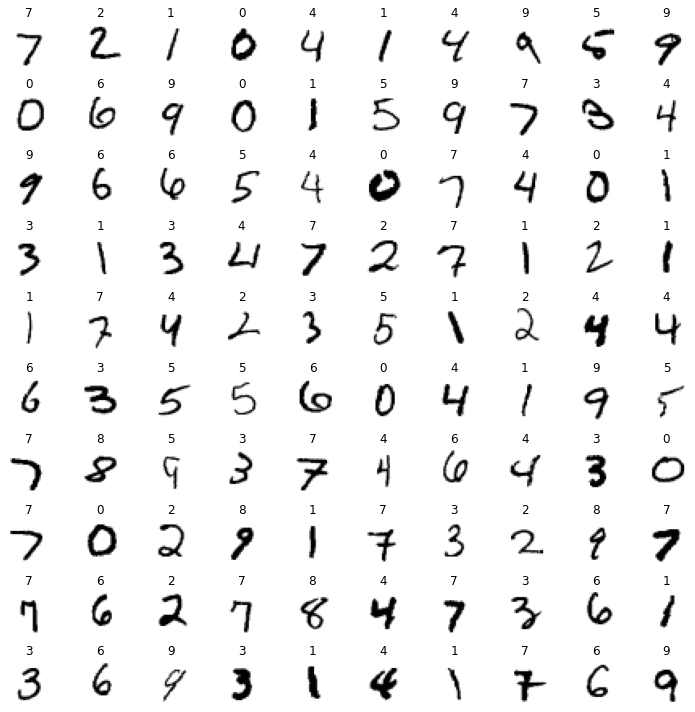

In [5]:
predicted = clf.predict(x_test[:100]).flatten().astype('uint8')

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))

for i  in range(100):
    ax = fig.add_subplot(10, 10, i+1)
    ax.set_axis_off()
    plt.imshow(x_test[i], cmap='binary') # binary與gray色相相反
    ax.set_title(f'{predicted[i]}')
    
plt.tight_layout()
plt.savefig('plot.png') # save image 
plt.show()